###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2022 by D. Koehn, notebook style sheet by L.A. Barba, N.C. Clementi

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())

# Digitale Signalverarbeitung: Mathematische Grundlagen

## Aufgabe 3.2  

Definieren Sie eine Sinusfunktion mit einer Periode von 25 s und berechnen Sie das Spektrum. Stellen Sie das Amplitudenspektrum, den Realteil und den Imaginärteil grafisch in einem geeigneten positiven Frequenzbereich grafisch dar. Der Abtastschritt soll 0.1 s betragen. Die Anzahl der Werte muss so gewählt werden, dass genau ein ganzzahliges Vielfache der Periode in dem Beobachtungsintervall dargestellt wird. Achten Sie weiter darauf, dass die Sinusfunktion ein Leistungssignal ist und dass Sie das Spektrum entsprechend normieren. Wollen Sie den doppelten Wert des Amplitudenspektrums darstellen? Warum? Die Länge des Beobachtungsintervalls soll nacheinander die folgenden Werte annehmen:

- 50 s,
- 100 s,
- 1000 s,
- 10000 s.

Interpretieren Sie die Ergebnisse. Wie verändert sich der Abtastschritt im Frequenzbereich?

In [2]:
# Import Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Wir beginnen mit der Definition der Periode der Sinusfunktion und dem zeitlichen Sampleintervall.

In [3]:
# Define parameters
T = 25.                  # period
dt = .1                  # time sampling

Da wir laut Aufgabenstellung unterschiedlich lange Zeitreihen erzeugen sollen, ist es naheliegend diese allgemein in einer Funktion zu definieren und anschließend nur die Eingabeparameter zu variieren.

In [4]:
def def_sine(T,dt,L):
    
    omega = 2. * np.pi / T   # compute circular frequency from period
    t = np.arange(0,L+dt,dt) # compute time vector
    x = np.sin(omega*t)      # compute sine wave
    
    return t,x

Mit der Funktion `def_sine` können wir nur einfach die gewünschten Zeitreihen erzeugen.

In [5]:
t_25, x_25 = def_sine(T,dt,25)
t_50, x_50 = def_sine(T,dt,50)
t_100, x_100 = def_sine(T,dt,100)
t_1000, x_1000 = def_sine(T,dt,1000)
t_10000, x_10000 = def_sine(T,dt,10000)

Mit der `Numpy` Funktion [fft.fft](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html) können wir die Fouriertransformation ausrechnen, mit der Funktion [fft.fftfreq](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html) die dazugehörigen Frequenzen. Da es sich bei der Sinusfunktion um ein Leistungssignal handelt, normieren wir die fouriertransformierte Zeitreihe auf die Länge des Beobachtungsintervalls $L = N dt$, wobei $N$ die Zahl der Zeitsample und $dt$ das Sampleintervall bezeichnen. Alle Schritte fassen wir in der Funktion `x_fft` zusammen ...

In [6]:
def x_fft(x,dt):
    
    # Fourier transform
    X = np.fft.fft(x)
    
    # Normalize by length of the time series
    N = len(x)
    X = X / (N*dt)
    
    # estimate frequencies    
    freq = np.fft.fftfreq(N, d=dt)
    
    return freq,X

... und wenden diese auf die Zeitreihen an.

In [7]:
# Compute FFT and frequencies
freq_25, X_25 = x_fft(x_25,dt)
freq_50, X_50 = x_fft(x_50,dt)
freq_100, X_100 = x_fft(x_100,dt)
freq_1000, X_1000 = x_fft(x_1000,dt)
freq_10000, X_10000 = x_fft(x_10000,dt)

Anschließend plotten wir die Amplitudenspektren ...

(0, 0.15)

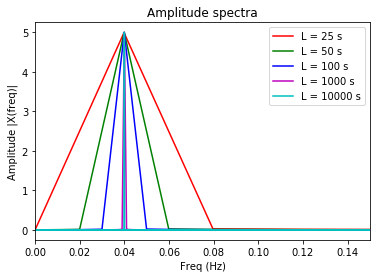

In [8]:
plt.plot(freq_25, np.abs(X_25), 'r', label='L = 25 s')
plt.plot(freq_50, np.abs(X_50), 'g', label='L = 50 s')
plt.plot(freq_100, np.abs(X_100), 'b', label='L = 100 s')
plt.plot(freq_1000, np.abs(X_1000), 'm', label='L = 1000 s')
plt.plot(freq_10000, np.abs(X_10000), 'c', label='L = 10000 s')
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude |X(freq)|')
plt.title('Amplitude spectra')
plt.legend()
plt.xlim(0, 0.15)

Man sieht sehr deutlich, daß bei einer Verlängerung der Zeitreihe das Amplitudenspektrum besser aufgelöst wird. Entfernt man die Normierung der Fouriertransformation auf die Länge des Beobachtungsintervalls, sieht man auch daß die Amplitude des Peaks mit zunehmender Länge des Beobachtungsintervalls zunimmt. Im Extremfall einer unendlich langen Zeitreihe erhalten wir den Diracschen $\delta$-Impuls.

Man könnte das Amplitudenspektrum noch mit einem Faktor 2 mulitplizieren, um die Energie,  welche in dem zweiten Peak bei -0.04 Hz vorhanden ist, diesem Peak bei 0.4 Hz hinzufügen. Damit würde man die Gesamtenergie der Zeitreihe veranschaulichen, dabei allerdings ignorieren, daß die Gesamtenergie auf den positiven und negativen Peak verteilt ist. 

Schließlich plotten wir den Real- ...

(0, 0.15)

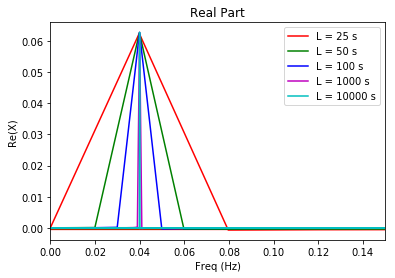

In [9]:
plt.plot(freq_25, np.real(X_25), 'r', label='L = 25 s')
plt.plot(freq_50, np.real(X_50), 'g', label='L = 50 s')
plt.plot(freq_100, np.real(X_100), 'b', label='L = 100 s')
plt.plot(freq_1000, np.real(X_1000), 'm', label='L = 1000 s')
plt.plot(freq_10000, np.real(X_10000), 'c', label='L = 10000 s')
plt.xlabel('Freq (Hz)')
plt.ylabel('Re(X)')
plt.title('Real Part')
plt.legend()
plt.xlim(0, 0.15)

... und Imaginärteil.

(0, 0.15)

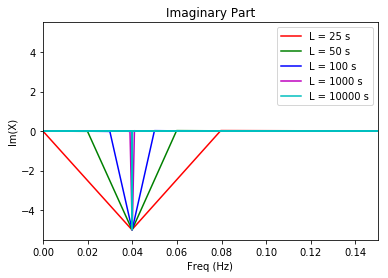

In [10]:
plt.plot(freq_25, np.imag(X_25), 'r', label='L = 25 s')
plt.plot(freq_50, np.imag(X_50), 'g', label='L = 50 s')
plt.plot(freq_100, np.imag(X_100), 'b', label='L = 100 s')
plt.plot(freq_1000, np.imag(X_1000), 'm', label='L = 1000 s')
plt.plot(freq_10000, np.imag(X_10000), 'c', label='L = 10000 s')
plt.xlabel('Freq (Hz)')
plt.ylabel('Im(X)')
plt.title('Imaginary Part')
plt.legend()
plt.xlim(0, 0.15)

Warum hat die numerische FFT der Sinusfunktion eigentlich einen Realteil? Bei der kontinuierlichen Sinusfunktion ist der Realteil gleich Null.

## Aufgabe 3.2  

Verändern sie die Periode der Sinusfunktion auf 22 s und wiederholen Sie die Berechnungen der vorangegangenen Aufgabe für die dort angegebenen Längen des Beobachtungsintervalls, die jetzt keine ganzzahligen Vielfache der Periode mehr sind. Interpretieren Sie die Ergebnisse.

In [11]:
# Define parameters
T1 = 22.                 # new period
dt = .1                  # time sampling

Definition der neuen Zeitreihen ...

In [12]:
t_25, x_25 = def_sine(T1,dt,25)
t_50, x_50 = def_sine(T1,dt,50)
t_100, x_100 = def_sine(T1,dt,100)
t_1000, x_1000 = def_sine(T1,dt,1000)
t_10000, x_10000 = def_sine(T1,dt,10000)

... und deren Fouriertransformierte und Amplitudenspektren.

(0, 0.15)

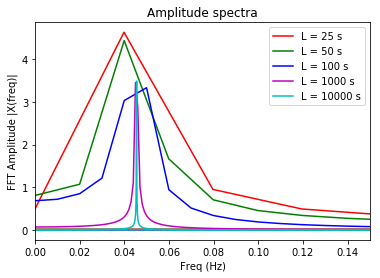

In [13]:
# Compute FFT and frequencies
freq_25, X_25 = x_fft(x_25,dt)
freq_50, X_50 = x_fft(x_50,dt)
freq_100, X_100 = x_fft(x_100,dt)
freq_1000, X_1000 = x_fft(x_1000,dt)
freq_10000, X_10000 = x_fft(x_10000,dt)

plt.plot(freq_25, np.abs(X_25), 'r', label='L = 25 s')
plt.plot(freq_50, np.abs(X_50), 'g', label='L = 50 s')
plt.plot(freq_100, np.abs(X_100), 'b', label='L = 100 s')
plt.plot(freq_1000, np.abs(X_1000), 'm', label='L = 1000 s')
plt.plot(freq_10000, np.abs(X_10000), 'c', label='L = 10000 s')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title('Amplitude spectra')
plt.legend()
plt.xlim(0, .15)

Im Vergleich zu den Amplitudenspektren des Sinussignals bei T = 25 s sieht man bei T = 22 s und großen Längen der Zeitreihe eine deutlich Verschiebung des Maximums des Peaks zu $\frac{1}{22\; s} = 0.045 Hz$. Bei kürzeren Zeitreihen, welche die Sinusfunktion nur über wenige Perioden abtasten, tritt der Peak der Spektrallinie bei einer falschen Frequenz auf. Darüberhinaus erscheinen die Linien breiter. Dies kann man dadurch erklären, daß die Zeitreihen nicht mehr periodisch sind.

## Aufgabe 3.3 

Definieren Sie ein zweidimensionales Feld $\cos(k_x x)\cos(k_y y)$ mit $k_x = 2\pi/(50 \mbox{m})$ und $k_y = 0$. Das Intervall soll in x- und y-Richtung jeweils $(0,200 \mbox{m})$ sein. Der Abtastschritt soll in x- und y-Richtung 1 m sein. Stellen Sie das Amplitudenspektrum der zweidimensionale Fourtransformation im zweidimensionalen Intervall$-0.1 \mbox{m} \leq k_x \leq 0.1 \mbox{m}$ und $-0.1 \mbox{m} \leq k_y \leq 0.1 \mbox{m}$ graphisch dar. Interpretieren Sie die Ergebnisse.

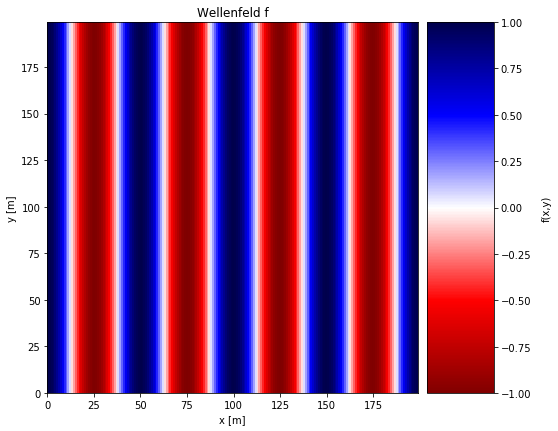

In [14]:
# Definitionen
dh = 1. # räumliche Abtastung

# Wellenzahlen in x- und y-Richtung
kx = 2. * np.pi / 50.
ky = 0.

# 2D Koordinaten
X, Y = np.meshgrid(np.arange(0, 200., 1.), np.arange(0, 200., 1.))

# Berechne zweidimensionales Wellenfeld
f = np.cos(kx*X)*np.cos(ky*Y)

# Image size
plt.figure(figsize=(8,8))

# Plotte Wellenfeld f
image = plt.imshow(f, cmap=plt.cm.seismic_r, interpolation='nearest', 
                   extent=[np.min(X),np.max(X),np.min(Y),np.max(Y)],aspect=1)

cbar = plt.colorbar(aspect=5.55, pad=0.02)
cbar.set_label('f(x,y)', labelpad=10)
plt.title('Wellenfeld f')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.show()

Berechne 2D Fouriertransformation des Wellenfeldes f(x,y) mit der `NumPy` Funktion [fft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html) und verschiebe den Nullpunkt in die Mitte des 2D Spektrums mit [fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html)

In [15]:
# 2D FFT
F = np.fft.fft2(f)

# Normalize 2D FFT
Nx, Ny = np.shape(F)
F = F / (dh*Nx)

# Shift zero-frequency to the center of the 2D spectrum
F = np.fft.fftshift(F, axes=None)

Berechne Kreiswellenzahlen KX, KY

In [16]:
# Compute wavenumbers in x- and y-direction
KX = np.arange(-Nx//2, Nx//2, 1)
KY = np.arange(-Ny//2, Ny//2, 1)

KX = 2. * np.pi * KX / (dh*Nx)
KY = 2. * np.pi * KY / (dh*Ny)

Plotte 2D Amplitudenspektrum

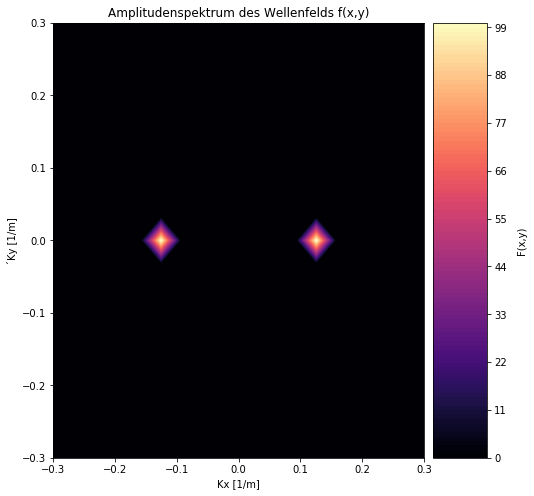

In [17]:
# Plotte 2D Amplitudenspektrum

# Image size
plt.figure(figsize=(8,8))

# Plotte Wellenfeld f
levels = np.linspace(np.min(np.abs(F)), np.max(np.abs(F)), num=101)
plt.contourf(KX, KY, np.abs(F),levels=levels,cmap='magma')

cbar = plt.colorbar(aspect=8, pad=0.02)
cbar.set_label('F(x,y)', labelpad=10)
plt.title('Amplitudenspektrum des Wellenfelds f(x,y)')
plt.xlabel('Kx [1/m]')
plt.ylabel('´Ky [1/m]')
xylim = .3
plt.xlim([-xylim,xylim])
plt.ylim([-xylim,xylim])
plt.show()

Im Amplitudenspektrum sollten theoretisch zwei Maxima bei Kreiswellenzahlen $(Kx_1,Ky_1)$ = $(\frac{2\pi}{50},0)$ und $(Kx_2,Ky_2)$ = $(-\frac{2\pi}{50},0)$ auftreten. Also bei ... 

In [18]:
Kx1 = 2. * np.pi / 50
Kx2 = -2. * np.pi / 50
print('Kx1 = ', Kx1)
print('Kx2 = ', Kx2)

Kx1 =  0.12566370614359174
Kx2 =  -0.12566370614359174


... auftreten. Dieses können wir verifizieren, indem wir mit der `NumPy` Funktion `where` bestimmen, bei welchen Indices das normierte Amplitudenspektrum einen Wert von 99 oder größer annimmt ...

In [19]:
out = np.where(np.abs(F)>=99)
print(out)

(array([100, 100], dtype=int64), array([ 96, 104], dtype=int64))


... und für diese Indices die entsprechenden Wellenzahl bestimmen:

In [20]:
KX[96]

-0.12566370614359174

In [21]:
KX[104]

0.12566370614359174